In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import joblib
import os
from tqdm import tqdm

In [2]:
data_root = Path("/mnt/i/bio/mave_curation/")

In [7]:
observations = {os.path.basename(p.parent): joblib.load(p) for p in tqdm(data_root.glob("*/observations.pkl"))}
# observations = {}
# for p in tqdm(data_root.glob("*/observations.pkl")):
#     dataset_name = os.path.basename(p.parent)
#     observations[dataset_name] = joblib.load(p)

32it [00:00, 77.70it/s]


In [8]:
sample_names = ['p_lp','b_lb','synonymous', 'gnomad','missense', 'vus']

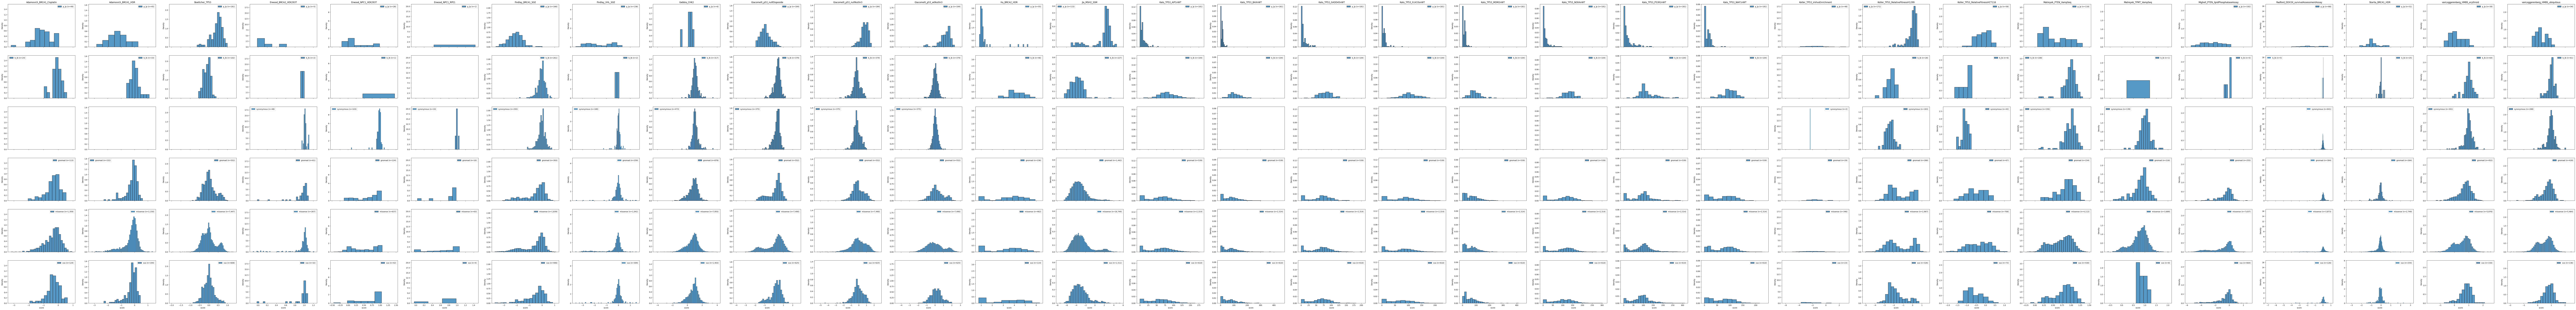

In [9]:
nsamples,ndatasets = len(sample_names),len(observations)
fig,ax = plt.subplots(nsamples,ndatasets,figsize=(ndatasets*8,nsamples*5),sharex='col',sharey='col')
for i,(dataset_name,obs) in enumerate(observations.items()):
    ax[0,i].set_title(f"{dataset_name}")
    for j,sample_name in enumerate(sample_names):
        if sample_name in obs and len(obs[sample_name]) > 0:
            sns.histplot(obs[sample_name],
            stat='density',
            ax=ax[j,i],
            label=f"{sample_name} (n={len(obs[sample_name]):,d})")
            ax[j,i].legend()
        

In [10]:
fig.savefig("raw_distribution.pdf",bbox_inches='tight',dpi=1200)